# New Section

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00


2481it [00:16, 152.61it/s]


X_Train.shape (2481, 150, 150, 3)
X_test.shape (745, 150, 150, 3)
y_train.shape (1736, 2)
y_test.shape (745, 2)
80134624/80134624 [==============================] - 3s 0us/step


Model: "VGG16_Architecture"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)

<ipython-input-1-ec15124d7273>:133: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/28
27/27 [==============================] - ETA: 0s - loss: 0.8355 - accuracy: 0.6209 
Epoch 1: val_loss improved from inf to 0.65139, saving model to VGG16_Model.hdf5
27/27 [==============================] - 880s 32s/step - loss: 0.8355 - accuracy: 0.6209 - val_loss: 0.6514 - val_accuracy: 0.6201 - lr: 0.0010


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/28
27/27 [==============================] - ETA: 0s - loss: 0.7395 - accuracy: 0.6717 
Epoch 2: val_loss did not improve from 0.65139
27/27 [==============================] - 796s 30s/step - loss: 0.7395 - accuracy: 0.6717 - val_loss: 0.6613 - val_accuracy: 0.5315 - lr: 0.0010
Epoch 3/28
27/27 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.6890 
Epoch 3: val_loss did not improve from 0.65139
27/27 [==============================] - 789s 30s/step - loss: 0.6958 - accuracy: 0.6890 - val_loss: 0.6559 - val_accuracy: 0.5302 - lr: 0.0010
Epoch 4/28
27/27 [==============================] - ETA: 0s - loss: 0.6357 - accuracy: 0.7057 
Epoch 4: val_loss improved from 0.65139 to 0.64540, saving model to VGG16_Model.hdf5
27/27 [==============================] - 758s 28s/step - loss: 0.6357 - accuracy: 0.7057 - val_loss: 0.6454 - val_accuracy: 0.5383 - lr: 0.0010
Epoch 5/28
27/27 [==============================] - ETA: 0s - loss: 0.6110 - accuracy: 0.7183 
Epoch 5: 

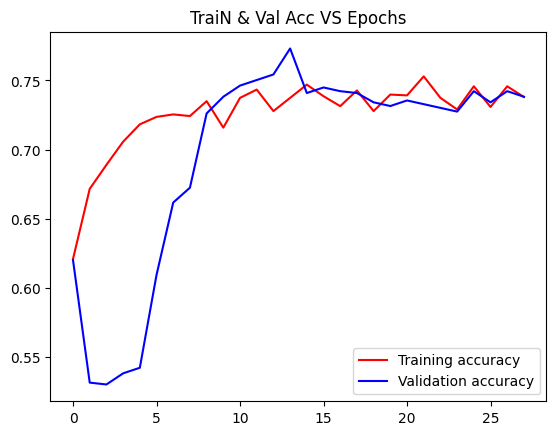

<Figure size 640x480 with 0 Axes>

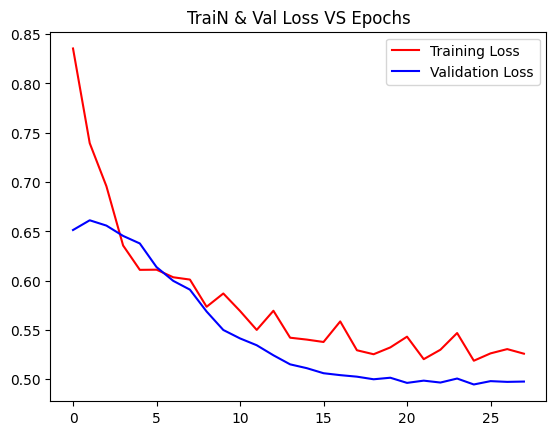

<Figure size 640x480 with 0 Axes>

24/24 [==============================] - 203s 8s/step - loss: 0.4948 - accuracy: 0.7423
Test Loss: 0.49477559328079224
24/24 [==============================] - 209s 9s/step
Test accuracy: 74.22818541526794
Confusion Score = [[250 141]
 [ 51 303]]
Precision = 0.6824324324324325
Recall = 0.8559322033898306
F1 Score = 0.7593984962406016


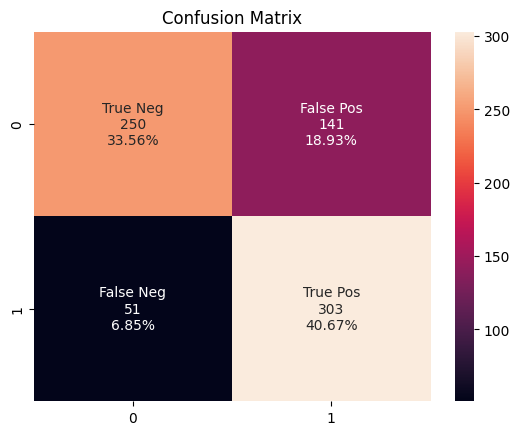

In [1]:
#Import Necessary Libraries
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import keras
#from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.applications import VGG19
#from keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
#import keras_preprocessing
!pip install Keras-Preprocessing
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt
#from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)


#Split Into Train Data & Test Data

disease_types=['COVID', 'non-COVID']
data_dir = '/home'
train_dir = os.path.join(data_dir)

train_data = []
for defects_id, sp in enumerate(disease_types):
    for file in os.listdir(os.path.join(train_dir, sp)):
        train_data.append(['{}/{}'.format(sp, file), defects_id, sp])
train = pd.DataFrame(train_data, columns=['File', 'DiseaseID','Disease Type'])

IMAGE_SIZE = 150
def read_image(filepath):
    return cv2.imread(os.path.join(data_dir, filepath))
def resize_image(image, image_size):
    return cv2.resize(image.copy(), image_size, interpolation=cv2.INTER_AREA)

X_train = np.zeros((train.shape[0], IMAGE_SIZE, IMAGE_SIZE, 3))
for i, file in tqdm(enumerate(train['File'].values)):
    image = read_image(file)
    if image is not None:
        X_train[i] = resize_image(image, (IMAGE_SIZE, IMAGE_SIZE))
X_Train = X_train / 255.
print('X_Train.shape',X_Train.shape)


Y_train = train['DiseaseID'].values
Y_train = to_categorical(Y_train, num_classes=2)

X_train, X_test, y_train, y_test = train_test_split(X_Train, Y_train, test_size = 0.3)

print('X_test.shape',X_test.shape)
print('y_train.shape',y_train.shape)
print('y_test.shape',y_test.shape)

X_train, X_val, Y_train, Y_val = train_test_split(X_Train, Y_train, test_size=0.3)

vgg19_model = VGG19(weights = 'imagenet', include_top = False,input_shape=(150,150,3))
x = vgg19_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

predictions = Dense(2, activation = 'softmax')(x)
model = Model(vgg19_model.input,predictions)
for layer in vgg19_model.layers:
    layer.trainable = False
optimizer = Adam(lr=0.0002)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model._name = "VGG16_Architecture"
model.summary()

#Train the Model

annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)

BATCH_SIZE = 64
EPOCHS = 28
SIZE=64
N_ch=3

training_datagen = ImageDataGenerator(rotation_range=40,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True,
                        shear_range=0.2)

train_generator = training_datagen.flow(
	X_train, Y_train,
batch_size=64
)
training_datagen.fit(X_train)

filepath="VGG16_Model.hdf5"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss',save_best_only=True, mode='min',verbose=1)
callbacks_list = [checkpoint]


datagen = ImageDataGenerator(rotation_range=360,
                        width_shift_range=0.2,
                        height_shift_range=0.2,
                        zoom_range=0.2,
                        horizontal_flip=True,
                        vertical_flip=True)

datagen.fit(X_train)

history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

#Plot the Results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

model.load_weights("VGG16_Model.hdf5")
score = model.evaluate(X_val, Y_val ,verbose=1)
print('Test Loss:', score[0])


Y_pred = model.predict(X_val)
Y_predx = np.argmax(Y_pred, axis = -1)
Y_valx = np.argmax(Y_val, axis = -1)
cf_matrix = confusion_matrix(Y_valx, Y_predx)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '')
plt.title("Confusion Matrix")


cfmatrix = confusion_matrix(Y_valx, Y_predx)
precision = precision_score(Y_valx, Y_predx)
recall = recall_score(Y_valx, Y_predx)
f1score = f1_score(Y_valx, Y_predx)

print('Test accuracy:', score[1]*100)
print(f"Confusion Score = {cfmatrix}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")
